In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df_train["Passengers Title"] = df_train["Name"].str.extract(r'([A-Za-z]+)\.')
df_test["Passengers Title"] = df_test["Name"].str.extract(r'([A-Za-z]+)\.')
title_series = df_train.groupby("Passengers Title")["Survived"].count()

In [11]:
title_series

Passengers Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Survived, dtype: int64

In [12]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [13]:
common_title = list(title_series[~(title_series < 10)].index)
df_train.loc[~df_train['Passengers Title'].isin(common_title), "Passengers Title"] = 'Other'
df_test.loc[~df_test['Passengers Title'].isin( common_title ), "Passengers Title"] = 'Other'

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)
    

In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
print(df_train.isnull().sum())

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Passengers Title      0
dtype: int64


In [17]:
print(df_test.isnull().sum())

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                  86
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin               327
Embarked              0
Passengers Title      0
dtype: int64


Impute Data with mean and median

In [18]:
df_train["Age"].fillna(np.median(df_train["Age"]), inplace = True)
df_test["Age"].fillna(np.median(df_test["Age"]), inplace = True)
df_test["Fare"].fillna(np.median(df_test["Fare"]), inplace = True)

In [19]:
sort_age = df_train.sort_values(by = ["Age"])

In [20]:
sort_fare = df_train.sort_values(by = ["Fare"])

<BarContainer object of 248 artists>

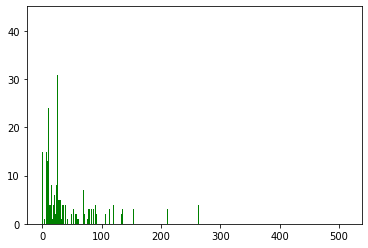

In [21]:
grouped = df_train.groupby("Fare")["Survived"].count()
grouped_new = grouped.to_frame().reset_index()
plt.bar(grouped_new["Fare"], grouped_new["Survived"], color ='green')

<BarContainer object of 88 artists>

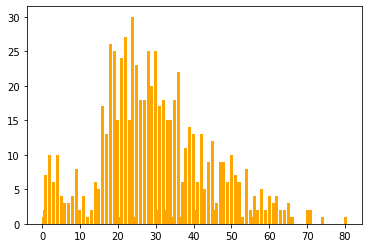

In [22]:
#Age and Survived
grouped = df_train.groupby("Age")["Survived"].count()
grouped_new = grouped.to_frame().reset_index()
plt.bar(grouped_new["Age"], grouped_new["Survived"], color ='orange')

In [23]:
#Gender Survived 
grouped = df_train.groupby(["Sex", "Survived"])["PassengerId"].count()
grouped_new = grouped.to_frame().reset_index()
grouped_new

,Sex,Survived,PassengerId
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [24]:
grouped = df_train.groupby(["Pclass","Survived"])["PassengerId"].count()
grouped_new = grouped.to_frame().reset_index()
grouped_new

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [25]:
grouped_title = df_train.groupby(["Passengers Title", "Survived"])["PassengerId"].count()
grouped_title = grouped_title.to_frame().reset_index()
grouped_title 

#plt.bar(grouped_new["Passengers Title"], grouped_new["Survived"], color ='blue')

,Passengers Title,Survived,PassengerId
0,Master,0,17
1,Master,1,23
2,Miss,0,55
3,Miss,1,127
4,Mr,0,436
5,Mr,1,81
6,Mrs,0,26
7,Mrs,1,99
8,Other,0,15
9,Other,1,12


In [26]:
#bins = [0	, 14, 31, 100.000000, 512.329200] 
group_names_fare = ["Low_Fare","Medium Low","Medium High","High_Fare"]
#df_train['GroupedFare'] = pd.cut(df_train['Fare'].astype(float), bins, labels=group_names_fare)
#df_test['GroupedFare'] = pd.cut(df_test['Fare'].astype(float), bins, labels=group_names_fare)

In [27]:
df_train['GroupedFare'] = pd.qcut(df_train['Fare'], q=4, precision=1, labels=group_names_fare)
df_test["GroupedFare"] = pd.qcut(df_test['Fare'], q=4, precision=1, labels=group_names_fare)

In [28]:
#bins = [0.420000, 12, 22.00, 40, 50.000000, 80.00] 
group_names_age = ["C","T", "YA","A","E"]
#df_train['AgeGroup'] = pd.cut(df_train['Age'], bins, labels=group_names_age)
#df_test['AgeGroup'] = pd.cut(df_test['Age'], bins, labels=group_names_age)

In [29]:
df_train['AgeGroup'] = pd.qcut(df_train['Age'], q=5, precision=1, labels=group_names_age)
df_test["AgeGroup"] = pd.qcut(df_test['Age'], q=5, precision=1, labels=group_names_age)

In [134]:
columns = ["Survived","Sex", "Pclass", "GroupedFare", "AgeGroup","SibSp", "Parch", "Passengers Title"]
features = ["Sex", "Pclass", "GroupedFare", "AgeGroup", "SibSp", "Parch","Passengers Title"]
target = "Survived"
features_to_one_hot = ["Sex", "Pclass", "GroupedFare", "AgeGroup", "Passengers Title"]

In [135]:
new_df_train = df_train[columns]
new_df_test = df_test[features]

In [136]:
new_df_train

,Survived,Sex,Pclass,GroupedFare,AgeGroup,SibSp,Parch,Passengers Title
0,0,male,3,Low_Fare,T,1,0,Mr
1,1,female,1,High_Fare,A,1,0,Mrs
2,1,female,3,Medium Low,YA,0,0,Miss
3,1,female,1,High_Fare,A,1,0,Mrs
4,0,male,3,Medium Low,A,0,0,Mr
...,...,...,...,...,...,...,...,...
886,0,male,2,Medium Low,YA,0,0,Other
887,1,female,1,Medium High,C,0,0,Miss
888,0,female,3,Medium High,NaN,1,2,Miss
889,1,male,1,Medium High,YA,0,0,Mr


In [137]:
one_hot_encoded_train = pd.get_dummies(new_df_train, columns = features_to_one_hot, drop_first = False)
one_hot_encoded_test = pd.get_dummies(new_df_test, columns = features_to_one_hot, drop_first = False)
one_hot_encoded_train = one_hot_encoded_train.drop(["Survived", "Sex_female"], axis = 1)
one_hot_encoded_test = one_hot_encoded_test.drop(['Sex_female'], axis = 1)

In [138]:
features = list(one_hot_encoded_test.columns)
features

['SibSp',
 'Parch',
 'Sex_male',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'GroupedFare_Low_Fare',
 'GroupedFare_Medium Low',
 'GroupedFare_Medium High',
 'GroupedFare_High_Fare',
 'AgeGroup_C',
 'AgeGroup_T',
 'AgeGroup_YA',
 'AgeGroup_A',
 'AgeGroup_E',
 'Passengers Title_Master',
 'Passengers Title_Miss',
 'Passengers Title_Mr',
 'Passengers Title_Mrs',
 'Passengers Title_Other']

In [139]:
#VIF(df_train, ["Age", "SibSp", "Parch", "Fare"])

In [140]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_train_normalized = pd.DataFrame(scaler.fit_transform(one_hot_encoded_train), columns = one_hot_encoded_train.columns)
#df_test_normalized = pd.DataFrame(scaler.fit_transform(one_hot_encoded_test), columns = one_hot_encoded_test.columns)

In [141]:
#we can drop the cabin since we are not going to use the Cabin column and focus on imputing Age
#from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)
#df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train_normalized),columns = df_train_normalized.columns)
#df_test_imputed = pd.DataFrame(imputer.fit_transform(df_test_normalized),columns = df_test_normalized.columns)

In [142]:
#cols = df_test_imputed.columns.tolist()

In [143]:
one_hot_encoded_train

,SibSp,Parch,Sex_male,Pclass_1,Pclass_2,Pclass_3,GroupedFare_Low_Fare,GroupedFare_Medium Low,GroupedFare_Medium High,GroupedFare_High_Fare,AgeGroup_C,AgeGroup_T,AgeGroup_YA,AgeGroup_A,AgeGroup_E,Passengers Title_Master,Passengers Title_Miss,Passengers Title_Mr,Passengers Title_Mrs,Passengers Title_Other
0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
887,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
888,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
889,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [144]:
#X_train = one_hot_encoded_train[features].drop(["Pclass_2", "Passengers Title_Mr","Passengers Title_Miss","GroupedFare_Low_Fare", "Passengers Title_Other", "AgeGroup_T"], axis = 1)
#Y_train = new_df_train[["Survived"]]
#X_test = one_hot_encoded_test[features].drop(["Pclass_2", "Passengers Title_Mr","Passengers Title_Miss","GroupedFare_Low_Fare", "Passengers Title_Other", "AgeGroup_T"], axis = 1)

In [145]:
one_hot_encoded = one_hot_encoded_train[features].drop(["AgeGroup_YA","Passengers Title_Other","Passengers Title_Mr","GroupedFare_Medium High","Pclass_2", "Passengers Title_Miss", "SibSp"],axis = 1)
features = one_hot_encoded.columns.tolist()

In [146]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded[features], df_train["Survived"], test_size=0.3)

In [147]:
VIF(one_hot_encoded_train, list(X_train.columns))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Parch                      1.585001
Sex_male                   1.676246
Pclass_1                   2.769287
Pclass_3                   2.015016
GroupedFare_Low_Fare       2.213870
GroupedFare_Medium Low     1.906671
GroupedFare_High_Fare      2.123039
AgeGroup_C                 1.597246
AgeGroup_T                 1.252626
AgeGroup_A                 1.311054
AgeGroup_E                 1.409132
Passengers Title_Master    1.385747
Passengers Title_Mrs       1.637691
dtype: float64

Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7798507462686567


In [149]:
from sklearn.model_selection import cross_val_predict
scores = cross_val_score(log_reg,X_train, y_train, cv = 10)
print(np.median(scores))

0.7921146953405018


In [150]:
data = {"PassengerId" : df_test["PassengerId"], "Survived" : y_pred}
#final_predict = pd.DataFrame(data)

In [151]:
#final_predict.groupby("Survived").count()

In [152]:
#final_predict.to_csv("predict_new_2.csv", index = False)

In [153]:
from google.colab import files
#files.download("predict_new_2.csv")

Random Forest Classification

In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2,5,6,15,20],
              "min_samples_leaf": [1, 2,4,16],
              "n_estimators" :[20,100,150,200],
              "criterion": ["gini"]}


model = GridSearchCV(model, param_grid= rf_param_grid, cv=10, scoring="accuracy", n_jobs= 4, verbose = 1)

model.fit(X_train,y_train)

# Best score
print(model.best_score_)

print('Best Params: ', model.best_params_)

#best estimator
model.best_estimator_

#print("Important features")
#pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
#print('__'*30)
#print(acc_random_forest)
print(accuracy_score(y_train, model.predict(X_train[features])))
print(accuracy_score(y_test, model.predict(X_test[features])))
print(classification_report(y_test, model.predict(X_test[features])))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
0.8234767025089607
Best Params:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.8683788121990369
0.8022388059701493
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       167
           1       0.74      0.73      0.74       101

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
scores = cross_val_score(model, X_test, y_test, cv=5)
print(scores)
print(np.mean(scores))
print(np.median(scores))

In [64]:
print(accuracy_score(y_test, model.predict(X_test)))

0.8134328358208955


In [124]:
y_pred = model.predict(one_hot_encoded_test[features])

In [125]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred})

In [127]:
submission.groupby("Survived").count()

,PassengerId
Survived,
0,264
1,154


In [128]:
submission.to_csv("final.csv", index = False)

In [129]:
from google.colab import files
files.download("final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Important features
____________________________________________________________
82.84


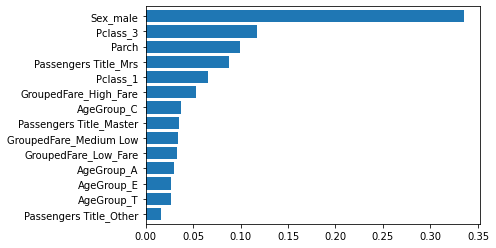

In [130]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train,y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [ ]:
scores = cross_val_score(random_forest,X_train, y_train, cv = 10)
print(scores)
print(np.mean(scores))

[0.82539683 0.79365079 0.79365079 0.75806452 0.88709677 0.83870968
 0.83870968 0.83870968 0.80645161 0.88709677]
0.8267537122375833


In [ ]:
from sklearn.model_selection import cross_val_predict
#y_pred = cross_val_predict(random_forest,X_train, y_train, cv = 10)
#y_pred_test = cross_val_predict(random_forest,X_test, y = None, cv = 10)

In [ ]:
#submission = pd.DataFrame({
#        "PassengerId": df_test["PassengerId"],
#        "Survived": Y_pred_rf})

In [ ]:
#submission.groupby("Survived").count()

In [ ]:
#submission.to_csv("pred_new.csv", index = False)

In [ ]:
from google.colab import files
#files.download("pred_new.csv")

In [120]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression


select_feature = SelectKBest(f_classif, k=3).fit(X_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)



x_train_chi = select_feature.transform(X_train)
x_test_chi = select_feature.transform(X_test)


clf_lr = model   
lr_chi_model = clf_lr.fit(x_train_chi,y_train)

selected_features_df.sort_values("Scores",ascending=False)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


,Feature,Scores
1,Sex_male,262.429462
12,Passengers Title_Mrs,90.803160
3,Pclass_3,88.857684
2,Pclass_1,62.412427
6,GroupedFare_High_Fare,44.035536
4,GroupedFare_Low_Fare,43.581626
5,GroupedFare_Medium Low,5.770097
7,AgeGroup_C,4.441973
11,Passengers Title_Master,4.065195
0,Parch,3.268690


ROC

In [ ]:
roc_auc

0.8499881880463029

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)
train_error = np.round(classifier.score(X_train, y_train), 2)
test_error = np.round(classifier.score(X_test, y_test), 2)
print(train_error)
print(test_error)

0.83
0.84
